In [1]:
# 参考: https://qiita.com/shopetan/items/30f6e0932485c976a946

In [2]:
import numpy as np
import scipy as sc
from scipy import linalg
from scipy import spatial
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
import pylab

In [3]:
from sklearn.datasets import load_iris
# irisデータの読み込み
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
ROW = len(df)
COLUMN = len(df.columns)

row = []
column = []
ave = [0.0 for i in range(COLUMN)]
vcm = np.zeros((ROW, COLUMN, COLUMN))
diff = np.zeros((1, COLUMN))
mahal = np.zeros(ROW)
tmp = np.zeros(COLUMN)


In [5]:
# 各特徴量毎
for i in range(COLUMN):
    column.append(list(df.iloc[:, i]))

# 各レコード毎
for i in range(0, ROW):
    row.append(list(df.iloc[i, :]))


In [6]:
# 各特徴量毎の平均値の計算
for i in range(COLUMN):
    # スライスという技法
    ave[i] = np.average(column[i][0:len(column[i])])


In [7]:
# 分散共分散行列の計算
# Numpyのメソッドを使うので，array()でリストを変換した．
row = np.array([row])
ave = np.array(ave)
print('--平均--')
print(ave)

# 分散共分散行列を求める
# np.swapaxes()で軸を変換することができる．
for i in range(ROW):
    diff = (row[0][i] - ave)
    diff = np.array([diff])
    vcm[i] = (diff * np.swapaxes(diff, 0, 1)) / ROW


--平均--
[5.84333333 3.05733333 3.758      1.19933333]


In [8]:
# mahalnobis distanceを求める
for i in range(ROW):
    # 一般逆行列を生成し，計算の都合上転値をかける
    vcm[i] = sc.linalg.pinv(vcm[i])
    vcm[i] = vcm[i].transpose()
    vcm[i] = np.identity(COLUMN)
    # 差分ベクトルの生成
    diff = (row[0][i] - ave)
    for j in range(COLUMN):
        tmp[j] = np.dot(diff, vcm[i][j])
    mahal[i] = np.dot(tmp, diff)

In [9]:
mahal

array([ 7.30732933,  7.451996  ,  8.367996  ,  7.64492933,  7.56452933,
        5.78092933,  8.03226267,  6.92586267,  8.666796  ,  7.198796  ,
        6.706796  ,  6.861596  ,  7.86052933, 10.65866267,  8.43252933,
        7.560796  ,  7.58732933,  7.11746267,  5.61626267,  7.01146267,
        5.547996  ,  6.70306267, 10.445596  ,  5.33586267,  5.656796  ,
        6.37012933,  6.12452933,  6.70706267,  7.09012933,  6.983196  ,
        6.745996  ,  6.05146267,  7.80812933,  7.982396  ,  6.98892933,
        8.273596  ,  7.35426267,  7.95306267,  9.12692933,  6.767196  ,
        7.75772933,  9.22866267,  9.143996  ,  5.92332933,  5.195196  ,
        7.460796  ,  6.75972933,  8.12506267,  6.80546267,  7.32892933,
        2.28586267,  0.971196  ,  2.51292933,  0.76012933,  1.296796  ,
        0.64746267,  1.31532933,  1.57146267,  1.316396  ,  0.601996  ,
        1.93546267,  0.29226267,  0.85786267,  1.01826267,  0.11906267,
        1.18812933,  0.70346267,  0.28626267,  1.503196  ,  0.39

マハラノビス距離
[2.70320723 2.72983443 2.89274887 2.76494653 2.75036894 2.40435632
 2.83412467 2.63170338 2.94394225 2.68305721 2.58974825 2.61946483
 2.80366356 3.26476074 2.90388177 2.74969016 2.75451072 2.66785732
 2.36986554 2.64791667 2.35541843 2.58902736 3.23196473 2.30994863
 2.37840198 2.52391151 2.47477864 2.58979973 2.66272968 2.64257375
 2.59730553 2.45997209 2.79430301 2.82531343 2.64365832 2.87638593
 2.71187438 2.82011749 3.02108082 2.60138348 2.78527006 3.0378714
 3.0239041  2.43378909 2.27929726 2.73144577 2.59994795 2.85044956
 2.60872817 2.70719954 1.51190696 0.98549277 1.58522217 0.87185396
 1.13876951 0.80465065 1.14687808 1.25357994 1.14734302 0.77588401
 1.39120907 0.54061323 0.92620876 1.00909002 0.34505459 1.09001346
 0.83872681 0.5350352  1.22604894 0.63234695 1.2124889  0.44810267
 1.38337606 1.00968444 0.7990803  1.01403287 1.45171026 1.59072185
 0.83082048 0.57965162 0.74939709 0.77010562 0.38694875 1.45386703
 0.91694929 0.92361392 1.308993   1.09744977 0.4354262

Text(0, 0.5, 'y')

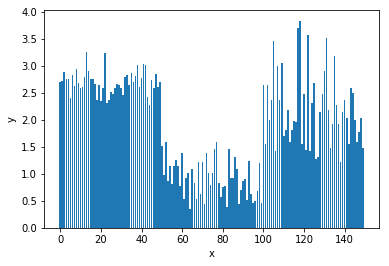

In [10]:
plot = pylab.arange(0.0, COLUMN, 1.0)
mahal = np.sqrt(mahal)

print("マハラノビス距離")
print(mahal)
plt.bar(range(ROW),mahal)
plt.title("")
plt.xlabel("x")
plt.ylabel("y")


# scipyで計算

In [11]:
# 参考: http://harmonizedai.com/article/t%E4%BA%8C%E4%B9%97%E6%B3%95/

In [12]:
from scipy.spatial import distance

# 平均値、共分散行列
mean = np.mean(df, axis=0)
print('--平均--')
print(mean)

cov = np.cov(df.T)
print('--共分散--')
print(cov)

maharanobis_list = []

# rowのマハラノビス距離計算
for index, row in df.iterrows():
    maharanobis = distance.mahalanobis(row, mean, np.linalg.pinv(cov))
    maharanobis_list.append(maharanobis)

print(len(maharanobis_list))
    

--平均--
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
--共分散--
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
150


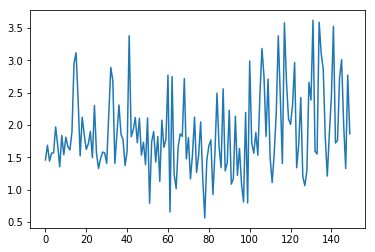

In [13]:
plt.plot(maharanobis_list)